In [1]:
from scipy import io
from scipy.stats import mode
from heapq import nsmallest
import numpy as np
from matplotlib import pyplot as plt

In [38]:
dct = io.loadmat('C:\Users\lhren\Desktop\Fall 2017/4771\hw\hw1data.mat')
X = dct['X'].astype(int) # see piazza @35
Y = dct['Y'].astype(int)
N, K, D = 10000, 10, 784
###Choose between 1e-6 and 1e-10
STEP_SIZE = 1e-10
MAX_ITER = 1000000

In [4]:
count = np.zeros(10)
sum_element = np.zeros(10)
sum_sq_element = np.zeros(10)
for i in range(N):
    label = Y[i]
    data = X[i]
    count[label]+=1
    sum_element[label]+=sum(data)
    for j in range(784):      
        sum_sq_element[label]+=data[j]**2

In [36]:
def norm(v):
    return sum(v*v)


def eval_f(theta):
    """ evaluates f at theta"""
    result = 0
    result+=sum(sum_sq_element) - 2*sum(sum_element*theta) + D*sum(count*theta**2)
    result = result*0.5
    return result

def plot_run(f_vals, iterations, step_size):
    plt.figure()
    plt.plot(range(iterations),f_vals,'ro')
    plt.title('step size ' + str(step_size)+' ,end in '+str(iterations)+' iterations')
    plt.show()

# (ii) function definitions
def grad_of_f(theta):
    """returns gradient of f valued at theta"""
    grad = 784*theta*count-sum_element
    
    return grad

def optimize_theta(theta, step_size, max_iter):
    """iterative optimization algorithm from 4(ii)
    
    returns array of function value from iterations
    """
    f_vals = [eval_f(theta)] # starting f value
    i = 0
    
    while i <= max_iter:
        i += 1
        grad = grad_of_f(theta)
        if (norm(grad) < 1e-8): # if optimal value reached
            break
        theta -= step_size * grad # else descend theta
        f_vals.append(eval_f(theta))
        
    
    return f_vals,i

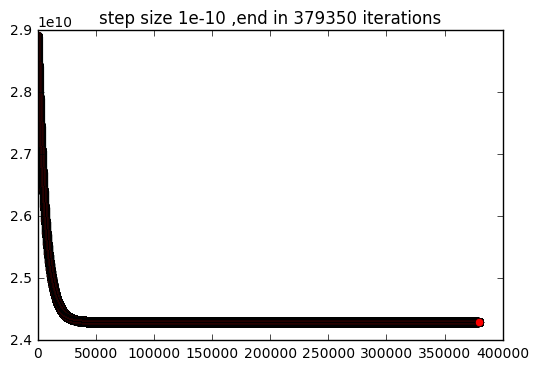

In [39]:
theta = np.zeros(K)
f_vals,i = optimize_theta(theta, STEP_SIZE, MAX_ITER)
plot_run(f_vals, i, STEP_SIZE)

In [40]:
grad_of_f(theta)

array([ -3.55243683e-05,  -1.77621841e-05,  -3.55243683e-05,
        -3.55243683e-05,  -1.77621841e-05,  -4.92781401e-05,
        -3.55206430e-05,  -1.77621841e-05,  -3.55243683e-05,
        -1.77621841e-05])